In [3]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import os
import statistics
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.model_selection import train_test_split,RandomizedSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc,roc_auc_score

%matplotlib inline
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

C:\Users\Vaidehi\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
# working directory
os.chdir("E:/report")


In [5]:
#Loading Dataset
data = pd.read_csv('day.csv')

In [6]:
df = pd.DataFrame(data)

In [7]:
#Creating Duplicate 
dfcopy = data.copy()

explore data

In [8]:
data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 88.6+ KB


In [10]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
data.nunique()  #see no. of unique values

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [12]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [13]:
#dteday and instant is of no use in our analysis so drop it
drop1 = ['casual', 'registered', 'instant', 'dteday']
data = data.drop(drop1, axis = 1)

In [14]:

continous = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

categorical = ['season','yr','mnth',
                     'holiday','weekday', 'workingday', 'weathersit']

Text(0.5,1,'Bike Rent Statistics')

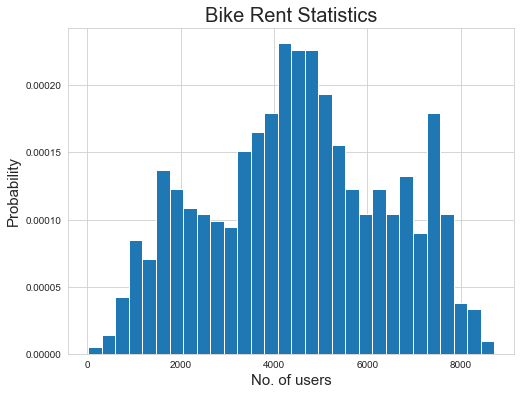

In [15]:
#Target Variable probability data distribution
plt.figure(figsize=(8,6))
plt.hist(data['cnt'], normed=True, bins=30)
plt.ylabel('Probability', fontsize= 15)
plt.xlabel('No. of users', fontsize= 15)
plt.savefig("users_count.png")
plt.title("Bike Rent Statistics",fontsize= 20)

In [16]:
#Function to view the categories present in each categorical feature and thier values
def view_feature_cat(obj):
    for i in range(len(obj)):
  
        print('Feature:',obj[i])
        print('-----------------------')
        print(data[str(obj[i])].value_counts())
    

In [17]:
view_feature_cat(categorical)

Feature: season
-----------------------
3    188
2    184
1    181
4    178
Name: season, dtype: int64
Feature: yr
-----------------------
1    366
0    365
Name: yr, dtype: int64
Feature: mnth
-----------------------
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     57
Name: mnth, dtype: int64
Feature: holiday
-----------------------
0    710
1     21
Name: holiday, dtype: int64
Feature: weekday
-----------------------
6    105
1    105
0    105
5    104
4    104
3    104
2    104
Name: weekday, dtype: int64
Feature: workingday
-----------------------
1    500
0    231
Name: workingday, dtype: int64
Feature: weathersit
-----------------------
1    463
2    247
3     21
Name: weathersit, dtype: int64


Data understanding

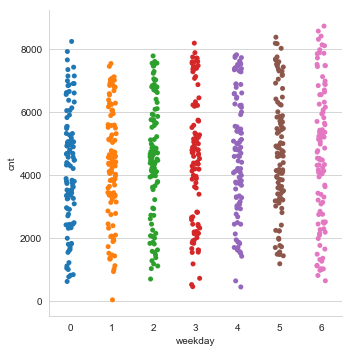

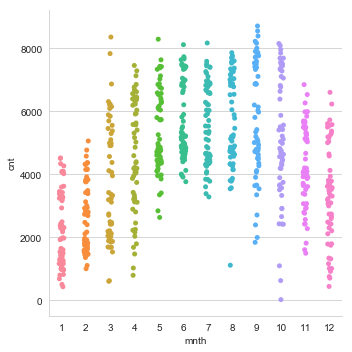

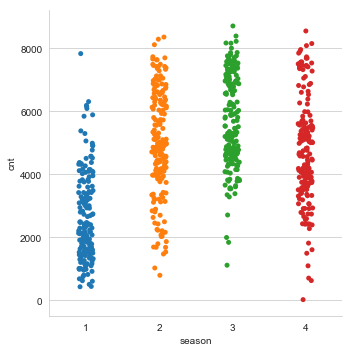

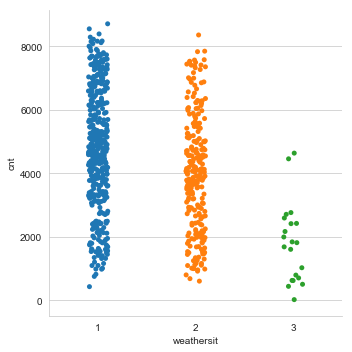

In [18]:
sns.catplot(x="weekday", y="cnt", data=data)
plt.savefig('days.png')

sns.catplot(x="mnth", y="cnt", data=data)
plt.savefig('mnth.png')

sns.catplot(x="season", y="cnt", data=data)
plt.savefig('season.png')

sns.catplot(x="weathersit", y="cnt", data=data)
plt.savefig('hol.png')

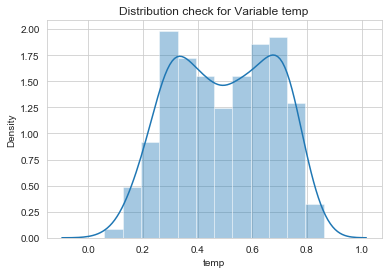

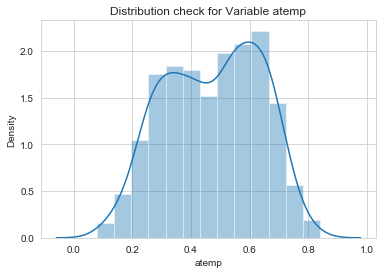

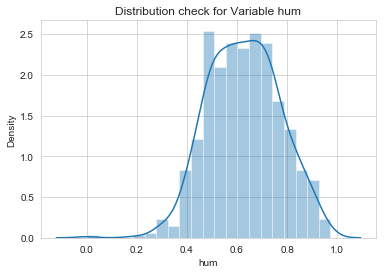

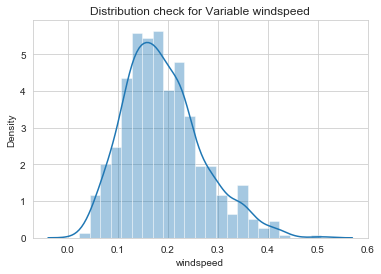

In [19]:
# Checking the distribution of values for variables in data
for i in continous:
    if i == 'cnt':
        continue
    sns.distplot(data[i],bins = 'auto')
    plt.title("Distribution check for Variable "+str(i))
    plt.ylabel("Density")
    plt.savefig('Density.png'.format(i=i))
    plt.show()

outlier analysis

In [28]:
def box_plot(x):
    plt.boxplot(data[x])
    plt.xlabel(x,fontsize= 15)
    plt.ylabel('Values',fontsize= 15)
    plt.xticks(fontsize=10, rotation=90)
    plt.yticks(fontsize=10)
    plt.title("Boxplot for {X}".format(X=x),fontsize = 20)
    plt.savefig("Boxplot for {X}.png".format(X=x))
    plt.show()
    box_plot('windspeed')
    box_plot('temp')
    box_plot('atemp')
    box_plot('hum')
   

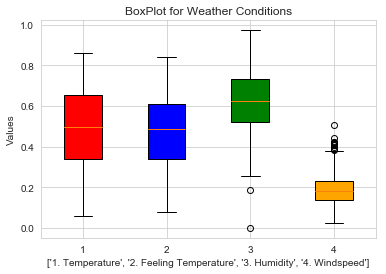

In [30]:
box=plt.boxplot([data['temp'], data['atemp'], data['hum'], data['windspeed']],patch_artist=True)
plt.xlabel(['1. Temperature', '2. Feeling Temperature', '3. Humidity', '4. Windspeed'])
plt.title("BoxPlot for Weather Conditions")
colors = ['red', 'blue', 'green', 'orange',]
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.ylabel('Values')
plt.savefig('BoxPlot for Weather Conditions')

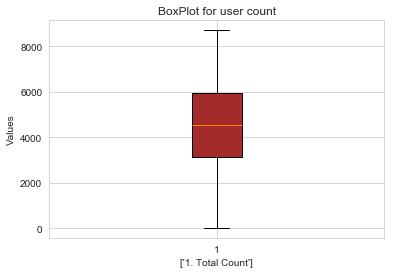

In [19]:
box2=plt.boxplot([data['cnt']],patch_artist=True)
plt.xlabel(['1. Total Count'])
plt.title("BoxPlot for user count")
colors = ['brown']
for patch, color in zip(box2['boxes'], colors):
    patch.set_facecolor(color)
plt.ylabel('Values')
plt.savefig('BoxPlot for user count')

In [20]:
# Getting 75 and 25 percentile of variable "windspeed"
q75, q25 = np.percentile(data['windspeed'], [75,25])
# Calculating Interquartile range
iqr = q75 - q25
    
# Calculating upper extream and lower extream
minimum = q25 - (iqr*1.5)
maximum = q75 + (iqr*1.5)
    
# Replacing all the outliers value to NA
data.loc[data['windspeed']< minimum,'windspeed'] = np.nan
data.loc[data['windspeed']> maximum,'windspeed'] = np.nan

# Checking % of missing values
data.isnull().sum().sum()

13

In [21]:
#Checking missing values in train dataset
print(data.isnull().sum())
# windspeed has missing value

season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            0
windspeed     13
cnt            0
dtype: int64


In [22]:
#impute the missing values by using mean imputation


data['windspeed'] = data['windspeed'].fillna(data['windspeed'].mean())

In [23]:
print(data.isnull().sum())

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


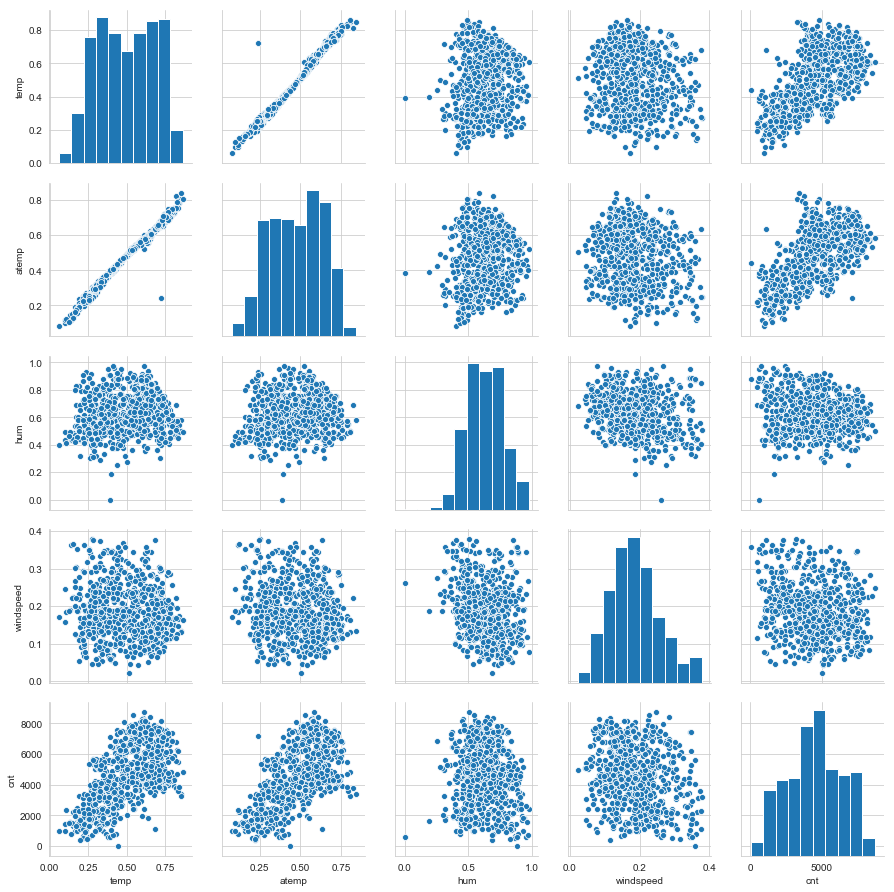

In [25]:
#plot pairplot
sns_plot = sns.pairplot(data=data[continous])
plt.plot()
plt.savefig('Pairplot')

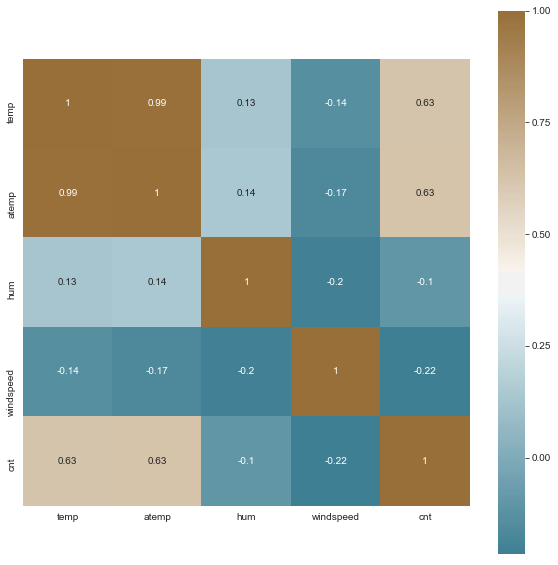

In [26]:
##Correlation analysis for continuous variables
#Correlation plot
data_corr = data.loc[:,continous]

#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(10, 10))

#Generate correlation matrix
corr = data_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 50, as_cmap=True),
            square=True, ax=ax, annot = True)
plt.plot()
plt.savefig('Heatmap')

In [27]:
label = 'cnt'
obj_dtype = categorical
drop_feat = []

## ANOVA TEST FOR P VALUES
import statsmodels.api as sm
from statsmodels.formula.api import ols

anova_p = []
for  i in obj_dtype:
    buf = label + ' ~ ' + i
    mod = ols(buf,data=data).fit()
    anova_op = sm.stats.anova_lm(mod, typ=2)
    print(anova_op)
    anova_p.append(anova_op.iloc[0:1,3:4])
    p = anova_op.loc[i,'PR(>F)']
    if p >= 0.05:
        drop_feat.append(i)

                sum_sq     df           F        PR(>F)
season    4.517974e+08    1.0  143.967653  2.133997e-30
Residual  2.287738e+09  729.0         NaN           NaN
                sum_sq     df           F        PR(>F)
yr        8.798289e+08    1.0  344.890586  2.483540e-63
Residual  1.859706e+09  729.0         NaN           NaN
                sum_sq     df          F        PR(>F)
mnth      2.147445e+08    1.0  62.004625  1.243112e-14
Residual  2.524791e+09  729.0        NaN           NaN
                sum_sq     df         F    PR(>F)
holiday   1.279749e+07    1.0  3.421441  0.064759
Residual  2.726738e+09  729.0       NaN       NaN
                sum_sq     df         F    PR(>F)
weekday   1.246109e+07    1.0  3.331091  0.068391
Residual  2.727074e+09  729.0       NaN       NaN
                  sum_sq     df         F    PR(>F)
workingday  1.024604e+07    1.0  2.736742  0.098495
Residual    2.729289e+09  729.0       NaN       NaN
                  sum_sq     df          F 

In [28]:
drop_feat

['holiday', 'weekday', 'workingday']

In [29]:
#'temp' and 'atemp' are correlated so one of them should be removed
#'holiday', 'weekday' and 'workingday' have p>0.05  so should be removed
dropvar = ['atemp', 'holiday', 'weekday', 'workingday']
data = data.drop(dropvar, axis = 1)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 8 columns):
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
cnt           731 non-null int64
dtypes: float64(3), int64(5)
memory usage: 45.7 KB


In [32]:
# Updating the Continuous and Categorical Variables after droping correlated variables
continous = [i for i in continous if i not in dropvar]
categorical = [i for i in categorical if i not in dropvar]

Feature Scaling

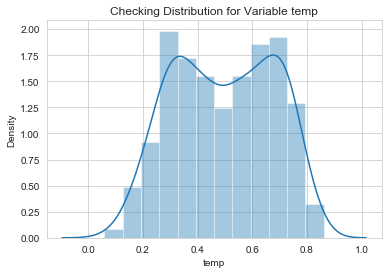

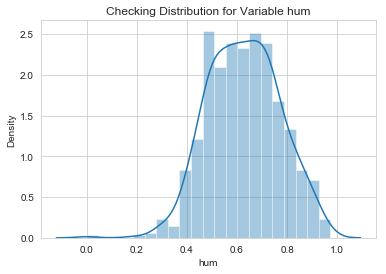

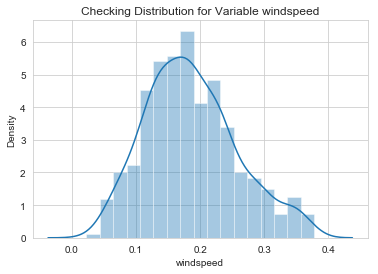

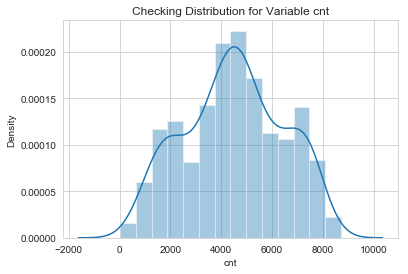

In [33]:
# Checking the distribution of values for variables in data
for i in continous:
    if i == 'data':
        continue
    sns.distplot(data[i],bins = 'auto')
    plt.title("Checking Distribution for Variable "+str(i))
    plt.ylabel("Density")
    plt.savefig('Density.png'.format(i=i))
    plt.show()

In [34]:
#Data before scaling
data.head()

,season,yr,mnth,weathersit,temp,hum,windspeed,cnt
0,1,0,1,2,0.344167,0.805833,0.160446,985
1,1,0,1,2,0.363478,0.696087,0.248539,801
2,1,0,1,1,0.196364,0.437273,0.248309,1349
3,1,0,1,1,0.200000,0.590435,0.160296,1562
4,1,0,1,1,0.226957,0.436957,0.186900,1600


In [35]:
# data is normally distributed, using Standardization for Feature Scalling
# #Standardization
for i in continous:
    if i == 'cnt':
        continue
    data[i] = (data[i] - data[i].mean())/(data[i].std())

In [36]:
#Data after scaling
data.head()

,season,yr,mnth,weathersit,temp,hum,windspeed,cnt
0,1,0,1,2,-0.826097,1.249316,-0.364668,985
1,1,0,1,2,-0.720601,0.478785,0.873479,801
2,1,0,1,1,-1.633538,-1.338358,0.870246,1349
3,1,0,1,1,-1.613675,-0.263001,-0.366777,1562
4,1,0,1,1,-1.466410,-1.340576,0.007143,1600


create dummy variables for  categorical variables

In [37]:
dummy_data = pd.get_dummies(data = data, columns = categorical)

#Copying dataframe
bikerent_data = dummy_data.copy()

In [38]:
dummy_data.head()

,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,yr_0,yr_1,...,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_1,weathersit_2,weathersit_3
0,-0.826097,1.249316,-0.364668,985,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,-0.720601,0.478785,0.873479,801,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.633538,-1.338358,0.870246,1349,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,-1.613675,-0.263001,-0.366777,1562,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,-1.466410,-1.340576,0.007143,1600,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


Applying Machine learning algorithms

In [39]:
#Using train test split functionality for creating sampling
X_train, X_test, y_train, y_test = train_test_split(dummy_data.iloc[:, dummy_data.columns != 'cnt'], 
                         dummy_data.iloc[:, 3], test_size = 0.30, random_state=101)

In [40]:
(X_train.shape),(y_train.shape)

((489, 24), (489,))

Decision Tree

In [42]:
# Importing libraries for Decision Tree 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Building model on top of training dataset
DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

# Calculate RMSE for test data and check accuracy
pred_test = DT.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

def MAPE(y_true,y_pred):
    mape = np.mean(np.abs((y_true-y_pred)/y_true))*100
    return mape

DT_rmse = rmse_for_test
DT_mape = MAPE(y_test,pred_test)
DT_r2 = r2_score(y_test,pred_test)

print('Decision Tree Model :')
print("RMSE = "+str(rmse_for_test))
print("RSquared test = "+str(r2_score(y_test,pred_test)))
print("MAPE = "+str(DT_mape))


#Decision Tree Model :
#RMSE = 997.3873927346699
#RSquared test = 0.7073525764693427
#MAPE = 25.707144204754727

Decision Tree Model :
RMSE = 997.3873927346699
RSquared test = 0.7073525764693427
MAPE = 25.707144204754727


Random Forest

In [43]:
# Importing libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor

# Building model on top of training dataset
RF = RandomForestRegressor(n_estimators = 500).fit(X_train,y_train)

# Calculating RMSE for test data to check accuracy
pred_test = RF.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

RF_rmse = rmse_for_test
RF_mape = MAPE(y_test,pred_test)
RF_r2 = r2_score(y_test,pred_test)

print('Random Forest Model :')
print("RMSE = "+str(rmse_for_test))
print("RSquared test = "+str(r2_score(y_test,pred_test)))
print("MAPE= "+str(RF_mape))

#Random Forest Model :
#RMSE = 569.3767118168532
#RSquared test = 0.904628995618636
#MAPE= 13.426577692653508

Random Forest Model :
RMSE = 569.3767118168532
RSquared test = 0.904628995618636
MAPE= 13.426577692653508


Linear Regression

In [44]:
# Importing libraries for Linear Regression
from sklearn.linear_model import LinearRegression

# Building model on top of training dataset
LR = LinearRegression().fit(X_train , y_train)

# Calculating RMSE for test data to check accuracy
pred_test = LR.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

LR_rmse = rmse_for_test
LR_mape = MAPE(y_test,pred_test)
LR_r2 = r2_score(y_test,pred_test)

print('Linear Regression Model ')
print("RMSE= "+str(rmse_for_test))
print("RSquared test= "+str(r2_score(y_test,pred_test)))
print("MAPE= "+str(LR_mape))

#Linear Regression Model 
#RMSE= 736.2047259447532
#RSquared test= 0.8405538055300172
#MAPE= 17.217590042129967

Linear Regression Model 
RMSE= 736.2047259447532
RSquared test= 0.8405538055300172
MAPE= 17.217590042129967


In [47]:
dat = {'Model_name': ['Decision tree default', 'Random Forest Default', 'Linear Regression'], 
          'RMSE': [DT_rmse, RF_rmse, LR_rmse,], 
         'MAPE':[DT_mape, RF_mape, LR_mape,],
        'RSquared test':[DT_r2, RF_r2, LR_r2,]}
results = pd.DataFrame(data=dat)
results
#Choose Random Forest

,Model_name,RMSE,MAPE,RSquared test
0,Decision tree default,997.387393,25.707144,0.707353
1,Random Forest Default,569.376712,13.426578,0.904629
2,Linear Regression,736.204726,17.217590,0.840554


In [48]:
##Random Search CV
from sklearn.model_selection import RandomizedSearchCV

RRF = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_rf = RandomizedSearchCV(RRF, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_rf = randomcv_rf.fit(X_train,y_train)
predictions_RRF = randomcv_rf.predict(X_test)
predictions_RRF = np.array(predictions_RRF)

parameters = randomcv_rf.best_params_

best_model = randomcv_rf.best_estimator_

predictions_RRF = best_model.predict(X_test)


#R^2
RRF_r2 = r2_score(y_test, predictions_RRF)

#Calculating MSE
RRF_mse = np.mean((y_test - predictions_RRF)**2)

#Calculate MAPE
RRF_mape = MAPE(y_test, predictions_RRF)

print('Random Search CV Random Forest model:')
print('Parameters = ',parameters)
print('R-squared = {:0.2}.'.format(RRF_r2))
print('MSE = ',round(RRF_mse))
print('MAPE = {:0.4}%.'.format(RRF_mape))


Random Search CV Random Forest model:
Parameters =  {'n_estimators': 15, 'max_depth': 23}
R-squared = 0.89.
MSE =  383892
MAPE = 14.11%.


In [ ]:
#Random Search CV Random Forest model:
#Parameters =  {'n_estimators': 15, 'max_depth': 23}
#R-squared = 0.89.
#MSE =  383892
#MAPE = 14.11%.